In [11]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 232s 1us/step


In [7]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [17]:
classes = ["airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"]

In [12]:
def plotimg(index):
    plt.figure()
    plt.imshow(x_train[index])

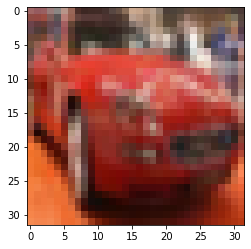

In [14]:
plotimg(5)

In [15]:
y_train[5]

array([1], dtype=uint8)

In [20]:
classes[y_train[5][0]]

'automobile'

In [24]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [25]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [30]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10,dtype='float32')

In [33]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
32*32*3

3072

In [81]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 484us/sample - loss: 1.8405 - accuracy: 0.3424
Epoch 2/50
50000/50000 [==============================] - 37s 744us/sample - loss: 1.6382 - accuracy: 0.4239
Epoch 3/50
50000/50000 [==============================] - 24s 476us/sample - loss: 1.5531 - accuracy: 0.4525
Epoch 4/50
50000/50000 [==============================] - 23s 463us/sample - loss: 1.4884 - accuracy: 0.4764
Epoch 5/50
50000/50000 [==============================] - 24s 477us/sample - loss: 1.4365 - accuracy: 0.4956
Epoch 6/50
50000/50000 [==============================] - 24s 472us/sample - loss: 1.3884 - accuracy: 0.5125
Epoch 7/50
50000/50000 [==============================] - 24s 482us/sample - loss: 1.3511 - accuracy: 0.5257
Epoch 8/50
50000/50000 [==============================] - 23s 470us/sample - loss: 1.3136 - accuracy: 0.5411
Epoch 9/50
50000/50000 [==============================] - 23s 466us/sample - loss: 1.2773 - accuracy: 0.5

In [82]:
y_pred = model.predict(x_test_scaled)

In [83]:
y_pred[0]

array([1.3024478e-06, 3.6921799e-07, 4.3747733e-07, 2.7469289e-04,
       2.0948586e-05, 4.5281008e-06, 2.6200893e-09, 1.8679765e-10,
       8.3231981e-07, 1.7669872e-07], dtype=float32)

In [84]:
np.argmax(y_pred[0])

3

In [85]:
y_pred = map(lambda x: np.argmax(x),y_pred)
y_pred = list(y_pred)

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

cm

array([[703,  21,  20,  25,  30,  43,  16,  13,  94,  35],
       [ 36, 683,   7,  24,   6,  23,   7,  18,  59, 137],
       [ 83,  16, 342,  73, 110, 225,  53,  54,  22,  22],
       [ 29,  16,  27, 304,  48, 431,  58,  44,  17,  26],
       [ 48,   8,  85,  53, 477, 175,  57,  62,  19,  16],
       [ 16,   5,  20, 114,  44, 716,  20,  40,  12,  13],
       [ 17,  15,  42,  88,  77, 168, 554,  14,  13,  12],
       [ 34,  11,  21,  40,  66, 172,   9, 603,   6,  38],
       [ 95,  60,  11,  26,  19,  38,   4,   8, 690,  49],
       [ 56, 155,   5,  37,   9,  45,   7,  35,  52, 599]], dtype=int64)

<AxesSubplot:>

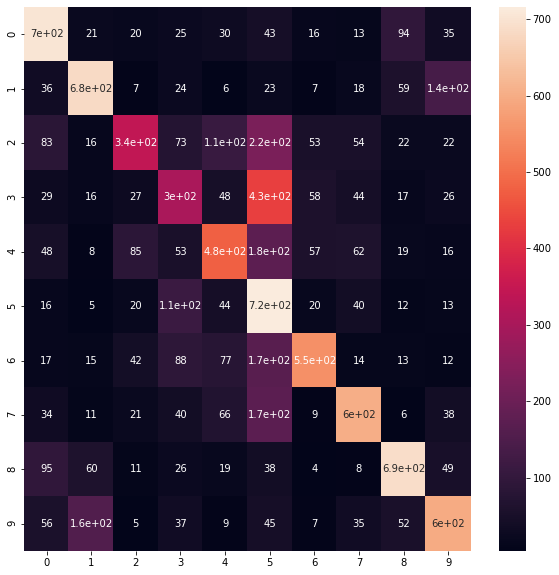

In [87]:
import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(cm,annot=True)